In [1]:
# importing stuff
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sp
from scipy.stats import linregress
import pandas as pd

%matplotlib inline

# Data Visualization 

## Importance of Visualizations 

"Proof by picture" is a phrase commonly used as a joke in mathematical study. It references situations where a mathematical theorem is very intuitive and seems straightforward to prove when looking at a visualization of the concept. Often times, however, what seems clear when visualized is actually very difficult to show when analyzed by a rigorous mathematical proof. Hence the irony of the statement: even though a picture can help us to understand a proof, it cannot actually be the proof itself. Unfortunately, this focus sometimes gives an equally incorrect idea. That is, that visualizations are not useful at all, or at least when compared to rigorous mathematical analysis. This is completely false, as the following example demonstrates.

We load and print a dataset here called Anscombe's quartet. Each of the four sets of data has the same means and variances for both $x$ and $y$, and the correlation between x and y in all four sets of data is the same. In addition, they all have the same linear least squares regression line, $y = \frac{1}{2}x + 3$.

In [3]:
# Anscombe's quartet dataset
data = np.load('anscombe.npy')
df = pd.DataFrame(data, columns = ['x','y','x','y','x','y','x','y'])
df

,x,y,x,y,x,y,x,y
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


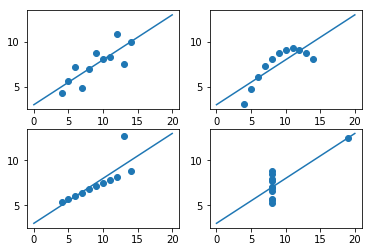

In [4]:
# pull information
x1 = data[:,0]
y1 = data[:,1]
x2 = data[:,2]
y2 = data[:,3]
x3 = data[:,4]
y3 = data[:,5]
x4 = data[:,6]
y4 = data[:,7]

# initialize x and y for regression line
x = np.linspace(0,20,500)
y = map(lambda i: i/2.+3, x)

# produce scatterplots
plt.subplot(221)
plt.scatter(x1,y1)
plt.plot(x,y)

plt.subplot(222)
plt.scatter(x2,y2)
plt.plot(x,y)

plt.subplot(223)
plt.scatter(x3,y3)
plt.plot(x,y)

plt.subplot(224)
plt.scatter(x4,y4)
plt.plot(x,y)

plt.show()

From these visualizations we can see the importance of visualizing data. For example, in the first plot, we see a pretty typical example of a least squares regression line through some points.

In the second plot, visualizing the data helps us notice that this particular set of data may be better approximated using a polynomial. 

In the third plot, we see a very linear set of data minus one outlier. This could be reason to suspect that maybe the outlier doesn't quite fit at all.

In the last plot we see something similar to the third, but with the outlier in a different direction. 

Overall, we can see here how important it is to create visualizations.

## Good Data Visualizations

Now that we've demonstrated that data visualization is important, we mention a few principles that make a visualization good. The first is clarity. If a data visualization is not clear and self-explanitory, it will have a much harder time helping people to gain any insight. Another is simplicity. If a visualization gets to complicated or cluttered, it may distract significantly from the goal of the visualization, which is to help clarify the data rather than make it harder to understand. A third principle is integrity. When producing a visualization care must be kept to only tell the truth, and not to stretch that truth in any way.

## Types of Visualizations

### Line plots

One type of visualization is a line plot. We will look at a particular visualization of the first ten Bernstein basis polynomials as a line plot and see in what ways it can be improved. 

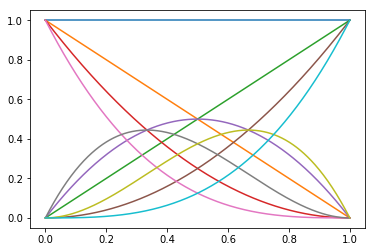

In [5]:
for n in xrange(4):
    for v in xrange(n+1):
        x = np.linspace(0,1,500)
        y = []
        for i in x:
            y.append(sp.binom(n,v)*(i**v)*((1-i)**(n-v)))
        plt.plot(x,y)
plt.show()

We note a few things in this visualization. One is that there are no labels, making it hard to tell which line represents which Bernstein polynomial, or even that this graph is supposed to represent that. Another is that it's all clustered together in one graph, and it might be better to separate each out into its own graph. 

To improve this graph, we will split the graph into ten smaller graphs, organized by the appropriate n and v. We will also increase the line thickness, and add titles for each graph, as well as labels for each axis on the left side or the bottom so as not to clutter the visualization too much. In addition, we will force all the graphs to be a uniform size to allow for easier comparison. 

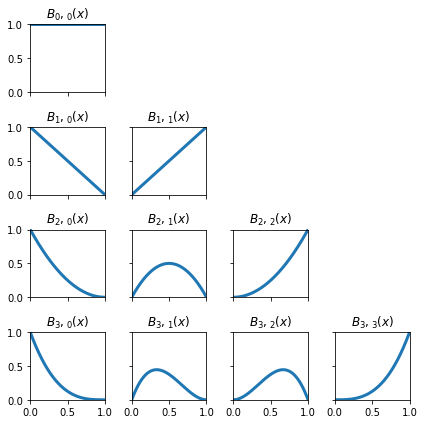

In [6]:
for n in xrange(4):
    for v in xrange(n+1):
        x = np.linspace(0,1,500)
        y = []
        for i in x:
            y.append(sp.binom(n,v)*(i**v)*((1-i)**(n-v)))
        plt.subplot(4,4,4*n+v+1)
        plt.plot(x,y,lw=3)
        plt.axis([0,1,0,1])
        plt.tick_params(which="both",top="off",right="off")
        if 4*n+v+1 < 13:
            plt.tick_params(labelbottom='off')
        if v % 4:
            plt.tick_params(labelleft='off')
        plt.title(r"$B_{},_{}(x)$".format(n, v))
        
plt.tight_layout(rect=(0,0,1,1.5))
plt.show()

### Scatter Plots

We will now examine some features of scatter plots and try to make some improvements. Scatter plots are useful for displaying data sets that don't have an inherent order. Some things to think about when making scatter plots are what the axes represent, what scale to use (linear or logarithmic), and which marker to use for the points and if the markers are an appropriate size and color to visualize the information. 

We will now load a dataset containing measurements of height, weight and age from over 1000 MLB players. We will use this dataset to examine different strengths and possibilities of scatter plots.

In [7]:
A = np.load('MLB.npy')
height = A[:,0]
weight = A[:,1]
age = A[:,2]

We will first plot height against weight as a line plot to show why this is not the ideal way to visualize the data.

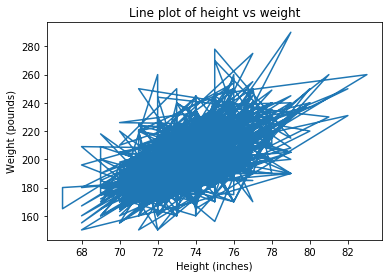

In [8]:
plt.plot(height,weight)
plt.ylabel("Weight (pounds)")
plt.xlabel("Height (inches)")
plt.title("Line plot of height vs weight")
plt.show()

We can see that the above plot is not the best possible visualization  because the data is incredibly cluttered and is hard to interpret. We can use a scatter plot to improve this visualization. We do this below.

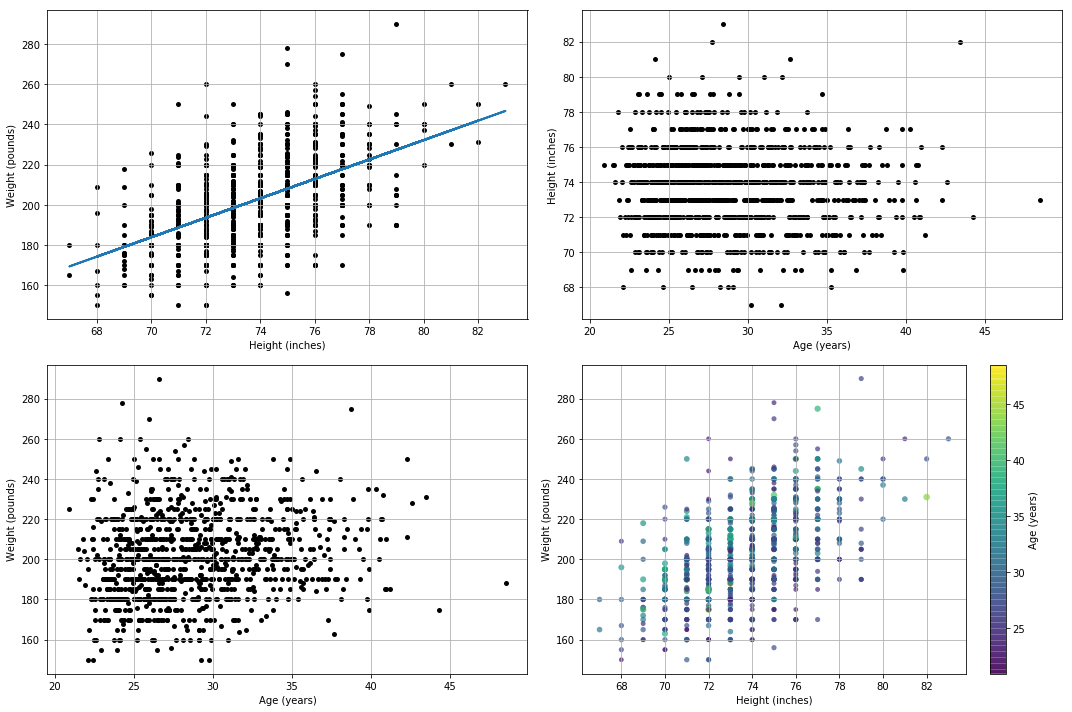

In [16]:
# Plots height against weight
plt.figure(figsize=[15,10])

plt.subplot(221)
plt.scatter(height, weight, s=25,color='k',lw=0)
plt.grid()
plt.ylabel("Weight (pounds)")
plt.xlabel("Height (inches)")
# Plotting least squares line
a, b, rvalue, pvalue, stderr = linregress(height, weight)
plt.plot(height, a*height + b, lw=2)

# Plots age against height
plt.subplot(222)
plt.scatter(age, height,s=25, color='k',lw=0)
plt.grid()
plt.ylabel("Height (inches)")
plt.xlabel("Age (years)")

# Plots age against weight
plt.subplot(223)
plt.scatter(age, weight, s=25,color='k',lw=0)
plt.grid()
plt.ylabel("Weight (pounds)")
plt.xlabel("Age (years)")

# Plots height against weight and uses 
# color and marker size to plot age
plt.subplot(224)
plt.scatter(height, weight, c=age, s=age, alpha=.7,lw=0)
cbar = plt.colorbar()
cbar.set_label("Age (years)")
plt.grid()
plt.ylabel("Weight (pounds)")
plt.xlabel("Height (inches)")

plt.tight_layout()
plt.show()

First we use the scatter plot to explore the relationship between height and weight. We notice that there is a correlation between them, so we also plot a linear regression line to further improve the visualization.

Second we compare age to height. We see no correlation really, so we leave it as is. 

We then compare age to weight, and also see no real correlation.

Finally, we compare all three on the same plot. We put height and weight as the x and y axes because there is a correlation between them. We color code the points to represent age, and see once again that there is no real correlation between age and either of the other variables because the colors are scattered so randomly.

### Histograms

For histograms, many of the same principles discussed previously apply. In addition, one important thing to keep in mind is the number and size of each bin. Too many or too few bins can lead to misinterpretation of the data. Below, we load some data on earthquakes and display it using histograms. 

In [5]:
year, magnitude, longitude, latitude = np.load('earthquakes.npy').T

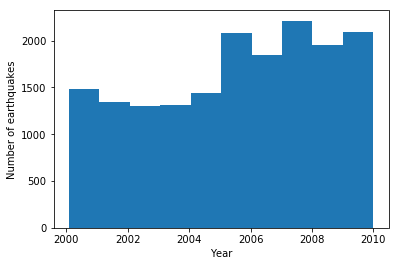

In [6]:
plt.hist(year, bins = 10)
plt.ylabel("Number of earthquakes")
plt.xlabel("Year")
plt.show()

The above histogram shows how many earthquakes happen in a
given year.

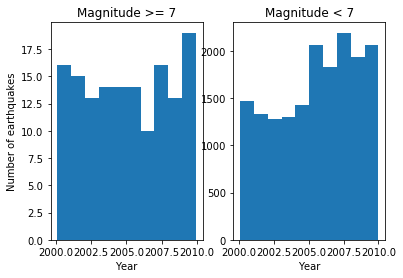

In [7]:
strong_earthquakes = []
weak_earthquakes = []
for i in xrange(len(magnitude)):
    if magnitude[i] >= 7:
        strong_earthquakes.append(year[i])
    else:
        weak_earthquakes.append(year[i])

plt.subplot(121)
plt.hist(strong_earthquakes, bins = 10)
plt.ylabel("Number of earthquakes")
plt.xlabel("Year")
plt.title("Magnitude >= 7")

plt.subplot(122)
plt.hist(weak_earthquakes, bins=10)
plt.xlabel("Year")
plt.title("Magnitude < 7")

plt.show()

As we can see from the above graphs, there are far more weak
earthquakes (those with magnitude < 7) per year than there are
strong ones (those with magnitude >= 7). Note the difference in scale between the two histograms.

Finally, we plot the locations of these earthquakes in terms of longitude and latitude. We expect this to give us a rough approximation of the fault lines.

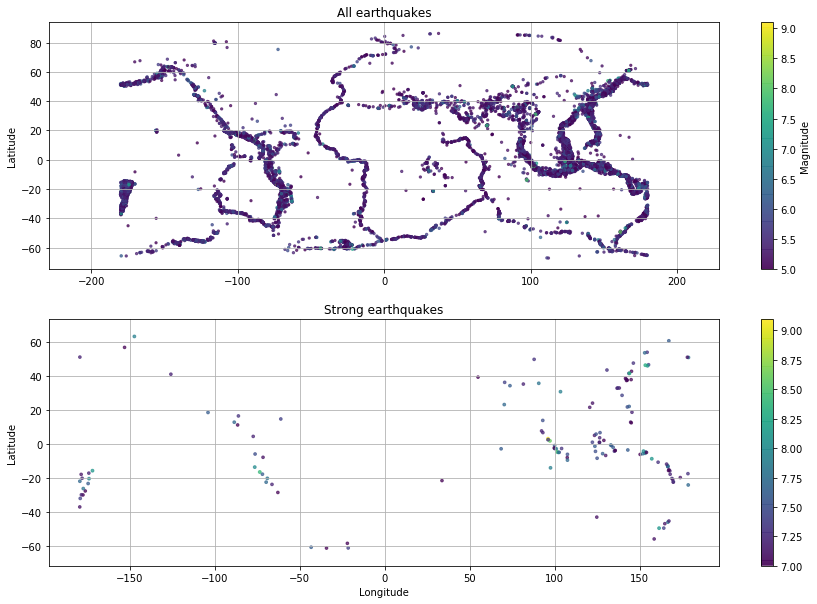

In [9]:
plt.figure(figsize=[15,10])
plt.subplot(211)
plt.scatter(longitude, latitude, c=magnitude, s=magnitude, alpha=.7)
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label("Magnitude")
plt.grid()
plt.title("All earthquakes")
plt.axis("equal")

se_long = []
se_lat = []
se_mag = []
for i in xrange(len(magnitude)):
    if magnitude[i] >= 7:
        se_long.append(longitude[i])
        se_lat.append(latitude[i])
        se_mag.append(magnitude[i])

plt.subplot(212)
plt.scatter(se_long, se_lat, c=se_mag, s=se_mag*20, alpha=.7)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar2 = plt.colorbar()
cbar.set_label("Magnitude")
plt.grid()
plt.title("Strong earthquakes")
plt.axis("equal")


plt.show()

We see above the locations of all the earthquakes in the first
plot, and the locations of the strongest ones in the second. This visualization very clearly helps us to see fault lines around the world.